# irisデータを使用して行う

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# dataの読み込み
from sklearn.datasets import load_iris

X, y = load_iris(as_frame=True, return_X_y=True)

In [9]:
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer

# Column Transformerを使用してデータの前処理（列ごとに異なる変換ができル）
sepal_cols = ["sepal length (cm)", "sepal width (cm)"]
petal_cols = ["petal length (cm)", "petal width (cm)"]

# 設定（verbose_feature_names_out　大切）
preprocessor = ColumnTransformer(
    [
        ("scaler", StandardScaler(), sepal_cols),
        ("kbin", KBinsDiscretizer(encode="ordinal"), petal_cols),
    ],
    verbose_feature_names_out=False,
).set_output(transform="pandas")

# Xを変換
X_out = preprocessor.fit_transform(X)
X_out.sample(n=5, random_state=0)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,-0.052506,-0.592373,3.0,4.0
62,0.189830,-1.973554,2.0,1.0
33,-0.416010,2.630382,0.0,1.0
107,1.765012,-0.362176,4.0,3.0
7,-1.021849,0.788808,1.0,1.0


In [10]:
# データの分割
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_out, y, random_state=0)

# KNN（k-近傍）
最も一般的なクラスに分類する。

- 次元の呪いのため、高次元データには向かない。
- 一般的にユークリッド距離が使われている。
- 特徴量が増えると予測が遅くなる
- クラス分類や回帰分析に使用できる

### k値の特徴
- k値が小さいとノイズに弱い
- 大きいと精度が下がる

[パラメータ](https://qiita.com/fujin/items/128ed7188f7e7df74f2c)

[1] score: 0.95
[2] score: 0.95
[3] score: 0.92
[4] score: 0.95
[5] score: 0.95
[6] score: 0.97
[7] score: 0.95
[8] score: 0.95
[9] score: 0.92
[10] score: 0.92
[11] score: 0.95
[12] score: 0.95
[13] score: 0.95
[14] score: 0.95
[15] score: 0.95
[16] score: 0.95
[17] score: 0.95
[18] score: 0.95
[19] score: 0.95
[20] score: 0.92
[21] score: 0.92
[22] score: 0.92
[23] score: 0.92
[24] score: 0.92
[25] score: 0.92
[26] score: 0.92
[27] score: 0.92
[28] score: 0.92
[29] score: 0.92
[30] score: 0.92


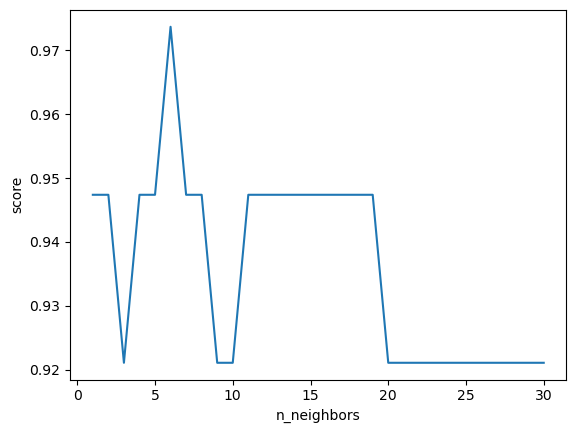

In [20]:
from sklearn.neighbors import KNeighborsClassifier
'''
パラメーター :
n_neightbors = 予測に使う数(default = 5)
weights = 予測に使う重み(default = "uniform")
    "uniform" = 均一な重み
    "distance" = 距離に応じた重み
algorithm = 予測のためのアルゴリズム(default = "auto")
    "ball_tree" = BallTreeアルゴリズム
    "kd_tree" = KD＿Treeアルゴリズム
    "brute" = 総当たり検索
    "auto" = 最適なアルゴリズムを自動で選択
leaf_size = KD Tree, Ball Treeのリーフサイズ
metric = 距離の測定方法(default="minkowski")
p = Minkowski metricにおけるPower Parameter
n_jobs = 利用するCPU数の設定
'''

list_nn = []
list_score = []

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    # 訓練
    knn.fit(X_train, Y_train)
    
    # 予測
    Y_pred = knn.predict(X_test)
    
    # 評価 R^2 誤差の平方和
    score = knn.score(X_test, Y_test)
    print("[%d] score: {:.2f}".format(score) % k)
    
    list_nn.append(k)
    list_score.append(score)
    
# 表示
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.plot(list_nn, list_score)

# Decision Tree(決定木)
分類木と回帰木を組み合わせたもので、ツリーによってデータを分析する。


[パラメータ](https://data-analysis-stats.jp/python/%E6%B1%BA%E5%AE%9A%E6%9C%A8%E5%88%86%E6%9E%90%E3%81%AE%E3%83%91%E3%83%A9%E3%83%A1%E3%83%BC%E3%82%BF%E8%A7%A3%E8%AA%AC/)

In [21]:
from sklearn.tree import DecisionTreeClassifier
'''
パラメーター：
criterion = データの分割方法(default = "gini")
    "gini" = 連続データが得意、誤分類を最小化
    "entropy" = カテゴリーデータが得意、探索的に基準値を探している
splitter = 各ノードで分割を選択するために使用される戦略(default="best")
    "best" = 最適な分割を選択、やや過学習になります。また計算時間が少なくなります。
    "random" = 最良のランダム分割を選択
max_depth = ツリーの最大深度、過学習を防ぐための制御(default=None)
min_samples_split = ノードを分割するために必要な最小サンプルサイズ。整数を指定した場合，その数，小数を指定した場合，全サンプルサイズに対する割合になります。0.01ぐらいを目安とし、過学習の場合は値を大きくしていきます。(default=2)
min_samples_leaf = 整数は葉を構成するのに必要な最小限のサンプル。少数は元々のサンプルサイズに占める割合。小さいと過学習になり気味。(default=1)
min_weight_fraction_leaf = リーフノードに必要な重みの総和の最小加重割合。データが不均衡の場合に使う(default=0.)
max_features = 適切な分割をするために考慮する特徴量の数を指定。整数を指定した場合，その個数，小数の場合全特徴量に対する割合個，auto を指定した場合，特徴量数のルート個，log2 を指定した場合，log2(特徴量数) 個になります。最初のわからない時は、Noneですが、過学習の場合は、減らします。 (default=None)
random_state = intの場合ジェネレーターによって使用されるシード(default=None)
max_leaf_nodes = 生成される決定木における最大の葉の数。Noneの場合、リーフノードの数は無制限です。過学習の場合は小さく。 (default=None)
min_impurity_split = 木の成長における早期停止の閾値。(default=0.)
class_weight = 各クラスに重みを設定できる。(default=None)
presort = データを事前に並び替えることで計算の高速化をする。データが小さいと高速化できる。(default=False)
'''
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, Y_train)

pre = tree_model.predict(X_test)

score = knn.score(X_test, Y_test)
print("[%d] score: {:.2f}".format(score) % k)

[30] score: 0.92


# SVM


2つのクラスのデータ群を分割するような境界線や超平面を設定することで分類や回帰を行う。


最も近いデータのマージが大きくなるように設定される


[パラメータ](https://qiita.com/arata-honda/items/8d08f31aa7d7cbae4c91)

In [22]:
from sklearn.svm import SVC
'''
パラメータ：
penalty = 罰則項(default=L2)
    l1 = L1正則化
    l2 = L2正則化
loss = 評価関数(default=hinge)
    hinge = ヒンジ損失
    squared_hinge = 2乗ヒンジ
dual = 双対問題を解くか(default=true)
tol = アルゴリズムの終了条件(default=1e-4)
C = ソフトマージンの厳しさ

'''
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train, Y_train)

pre = svm.predict(X_test)

score = svm.score(X_test, Y_test)
print("[%d] score: {:.2f}".format(score) % k)

[30] score: 0.97


# Logistic Regression


データに対して重みとバイアスをかけて計算する。


線形分離可能な場合に高い性能を発揮する。


[パラメータ](https://datawokagaku.com/logstic_reg_python/)

In [23]:
from sklearn.linear_model import LogisticRegression
'''
パラメータ：
penalty = 正則化の方法(default=l2)
    l1 = L1正則化
    l2 = L2正則化
tol = アルゴリズムの終了条件(1e-4)
C = 正則化の強度(default=1.0)
class_weight = クラスの重み。偏りのあるデータに対して使う(default=None)
solver = パラメータの探索方法
    newton-cg = 二次微分を使って最適化。計算量多い
    lbfgs = 二次微分を近似するBFGS法のlimited-memory版。限られたメモリで実行できる。小さいデータで精度が良い。
    liblinear = 特徴量が高次元のときに推奨
    sag = データや特徴量が大きいと他のアルゴリズムよりも早く収束する
    saga = SGGの仲間でL1ノルムの正則化をかけたバージョン
warm_start = 再学習するときにモデルを初期化セずに、更に学習したモデルに再学習できる。
multi_class = クラス数の選択(default=auto)
'''
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train, Y_train)

pre = lr.predict(X_test)

score = lr.score(X_test, Y_test)
print("[%d] score: {:.2f}".format(score) % k)

[30] score: 0.97


# Kernel SVM

gammaの値で複雑さが変わる。小さいとなめらかで、大きとモデルが複雑な形に対応される


カーネルを使用して非線形に対応

In [24]:
from sklearn.svm import SVC


svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train, Y_train)

pre = svm.predict(X_test)

score = svm.score(X_test, Y_test)
print("[%d] score: {:.2f}".format(score) % k)

[30] score: 0.95


# Kernel SVM 2

In [25]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train, Y_train)

pre = svm.predict(X_test)

score = svm.score(X_test, Y_test)
print("[%d] score: {:.2f}".format(score) % k)

[30] score: 0.39


# Random Forest
決定木とアンサンブル学習の組み合わせ。


決定木よりも高精度で、これよりも多層化したものがディープフォレストと呼ばれている。
- 決定木：YES or NOなどの質問をして1つずつ答えていくことで正解にたどり着く
- アンサンブル：複数のアルゴリズムを組み合わせて精度を高める技術
- バギング：複製されたデータセットごとに学習器を生成し、それを使って予測する。分類は多数決、回帰は平均
- ブースティング：複数のモデルを使って学習を直列的に進める手法。前のモデルの結果を参考に次のモデルを構築する。バギングよりも時間が掛かるが精度がよい。

[パラメータ](https://qiita.com/hara_tatsu/items/581db994ec8866afe8f8)

In [27]:
from sklearn.ensemble import RandomForestClassifier
'''
パラメータ：
n_estimator = 決定木の本数(default=100)
criterion = 決定機モデルにデータを分割するための指標(default='gini')
    gini = ジニ係数
    entropy = 交差エントロピー
max_depth = それぞれの決定木の深さ。過学習を防ぐ。小さいと精度は低い、大きいと精度は高いが過学習になりがち(default=None)
min_samples_split = ノードを分割するために必要となってくるサンプル数。サンプル数以下になると分割が止まる。小さすぎるとモデルが過剰適合(default=None)
max_leaf_nodes = 決定木モデルの葉の数(default=None)
min_samples_leaf = 決定木の分割後に葉に必要となってくるサンプル数(default=1)
random_state = データを分割する際に発生するシード値の固定
n_jobs = 利用するコアの数 -1で利用できるすべてになる
'''
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, Y_train)

pre = forest.predict(X_test)

score = forest.score(X_test, Y_test)
print("[%d] score: {:.2f}".format(score) % k)

[30] score: 0.95


# 参考

https://github.com/RuoAndo/ai-sec/blob/main/2023/2023-11-29-01.ipynb
